In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import EDA_functions as func

In [2]:
site = "E"

In [3]:
# load the data
# get parent directory
os.chdir("..")
data_directory = 'Data'

data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

# read the data
data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

# reset to current directory
fd = sys.path[0]
os.chdir(fd)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158115 entries, 0 to 158114
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     158115 non-null  int64  
 1   ts                             158115 non-null  object 
 2   instanceID                     158115 non-null  object 
 3   AoARel                         157719 non-null  float64
 4   bladePitch                     157854 non-null  float64
 5   bladePitchMax                  0 non-null       float64
 6   bladePitchMin                  0 non-null       float64
 7   bladePitchSetPoint             0 non-null       float64
 8   bladePitchStd                  0 non-null       float64
 9   cP                             157703 non-null  float64
 10  generatorTorque                0 non-null       float64
 11  rotorTorque                    155300 non-null  float64
 12  TI                            

In [5]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158115 entries, 0 to 158114
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  158115 non-null  int64 
 1   ts          158115 non-null  object
 2   instanceID  158115 non-null  object
 3   value       158115 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.8+ MB


In [6]:
# print the number of turbines and the turbine IDs
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

3
['E_WTG01' 'E_WTG02' 'E_WTG03']


In [7]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [8]:
# Add month, day, and hour
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [9]:
data.columns.values

array(['Unnamed: 0', 'ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [10]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 
                               'TI', 'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

In [11]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
100720,2020-08-21 03:30:00,8,21,3,E_WTG02,6.9,NaN,NaN,19.0,449.0,1
17967,2020-02-11 14:10:00,2,11,14,E_WTG01,15.4,NaN,NaN,13.3,2363.0,1
114960,2020-09-23 02:40:00,9,23,2,E_WTG01,7.4,NaN,NaN,13.0,524.0,1
17890,2020-02-11 09:50:00,2,11,9,E_WTG02,12.0,NaN,NaN,9.3,2028.0,1
68329,2020-06-07 04:00:00,6,7,4,E_WTG02,11.6,NaN,NaN,14.0,2084.0,1


In [12]:
data.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
count,158115.000000,158115.000000,158115.000000,157860.000000,0.0,0.0,157422.000000,157860.000000,158115.000000
mean,6.513557,15.756551,11.499782,6.600901,NaN,NaN,12.442595,584.956784,0.904753
std,3.451296,8.811708,6.922324,3.330535,NaN,NaN,5.356154,679.436272,0.293557
min,1.000000,1.000000,0.000000,0.000000,NaN,NaN,-2.100000,0.000000,0.000000
25%,4.000000,8.000000,5.000000,4.100000,NaN,NaN,9.000000,82.000000,1.000000
50%,7.000000,16.000000,11.000000,6.300000,NaN,NaN,12.000000,300.000000,1.000000
75%,10.000000,23.000000,17.000000,8.600000,NaN,NaN,16.000000,837.000000,1.000000
max,12.000000,31.000000,23.000000,25.700000,NaN,NaN,36.800000,2365.000000,1.000000


### Plot time series

In [13]:
# select one turbine
data_01 = data[data['instanceID'] == site + '_WTG01']

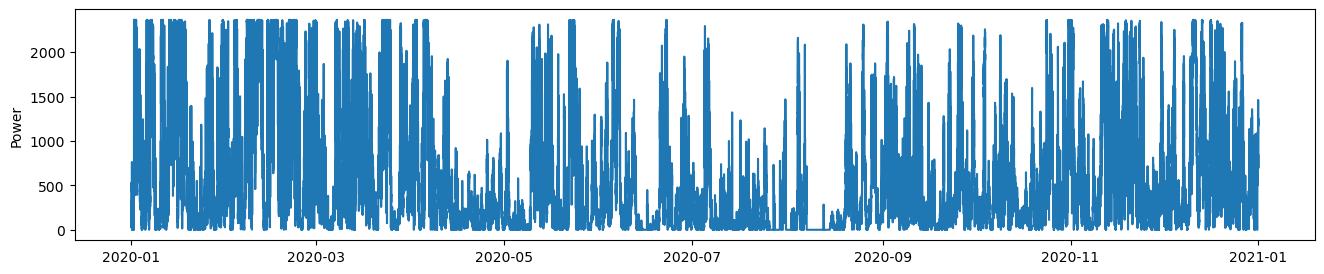

In [14]:
func.plot_timeseries(data_01, 'Power')

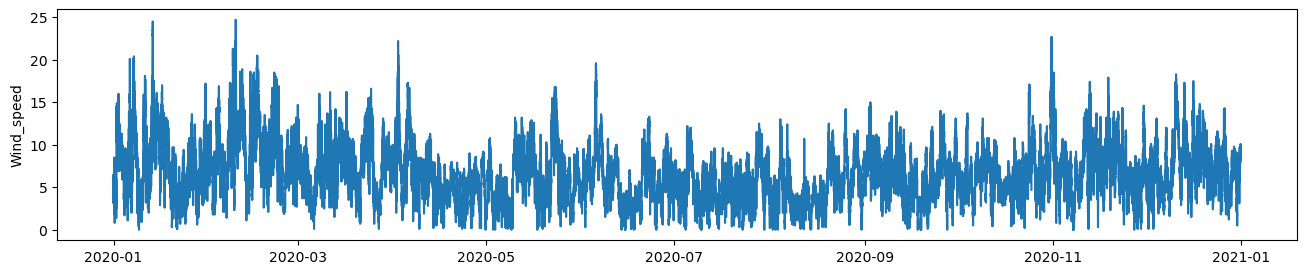

In [15]:
func.plot_timeseries(data_01, 'Wind_speed')

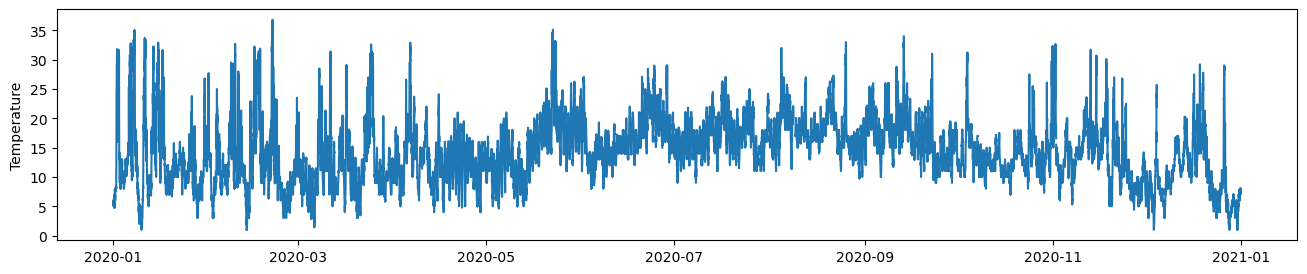

In [16]:
func.plot_timeseries(data_01, 'Temperature')

### Full performance data

In [17]:
# sort the turbine IDs and create a list of the IDs
instanceID = sorted(data.instanceID.unique().tolist())
ID = [instanceID[i][5:] for i in range (len(instanceID))] 

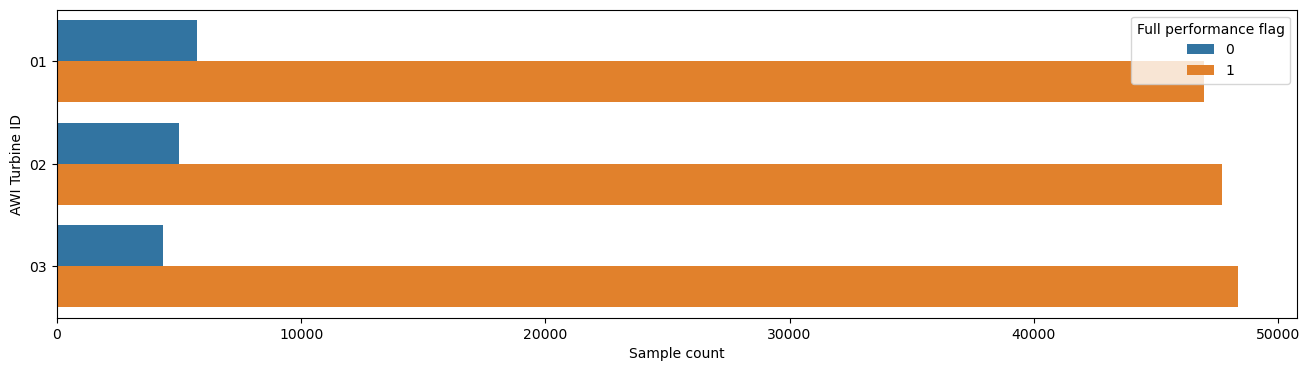

In [18]:
# Plot bar chart of full performance flag vs sample count for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
func.plot_fullperformanceflag(df=bar, order=instanceID, ticklabels=ID, figsize = (16,4), orient = "h")

In [19]:
# only select rows with flag value = 1
data = data[data['value'] == 1]

# drop irrelevant columns 
data = data.drop(columns = ['value', 'Wind_speed_sd'])

In [20]:
# remove invalid values and null entries. 
# acceptable TI range: [0, 100]
# acceptable temperature range: [-5, 40]
data_clean = func.clean_data(data)
data_clean

,ts,Month,Day,Hour,instanceID,Wind_speed,TI,Temperature,Power
0,2020-01-01 00:00:00,1,1,0,E_WTG01,6.2,NaN,6.0,236.0
1,2020-01-01 00:00:00,1,1,0,E_WTG02,5.8,NaN,5.0,275.0
2,2020-01-01 00:00:00,1,1,0,E_WTG03,5.9,NaN,2.0,279.0
3,2020-01-01 00:10:00,1,1,0,E_WTG01,5.7,NaN,6.0,269.0
4,2020-01-01 00:10:00,1,1,0,E_WTG02,5.6,NaN,4.9,224.0
...,...,...,...,...,...,...,...,...,...
158110,2020-12-31 23:50:00,12,31,23,E_WTG02,8.9,NaN,7.0,791.0
158111,2020-12-31 23:50:00,12,31,23,E_WTG03,8.6,NaN,6.0,744.0
158112,2021-01-01 00:00:00,1,1,0,E_WTG01,8.7,NaN,8.0,838.0
158113,2021-01-01 00:00:00,1,1,0,E_WTG02,8.8,NaN,7.0,757.0


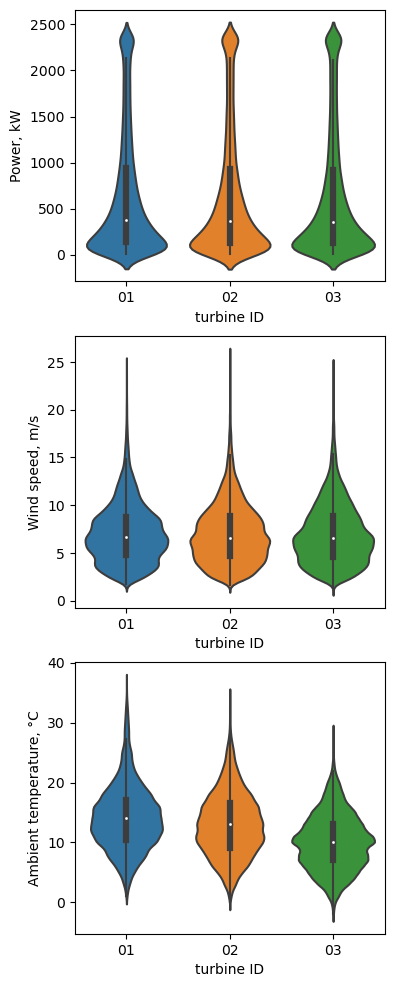

In [21]:
# Make violin plots of the variables 
var = [ 'Power','Wind_speed','Temperature']
var_name = [ 'Power, kW','Wind speed, m/s','Ambient temperature, °C']

func.plot_violinplot(df=data_clean, var=var, var_name=var_name, order=instanceID, 
                ticklabels=ID, figsize=(4, 12), orient = "v")

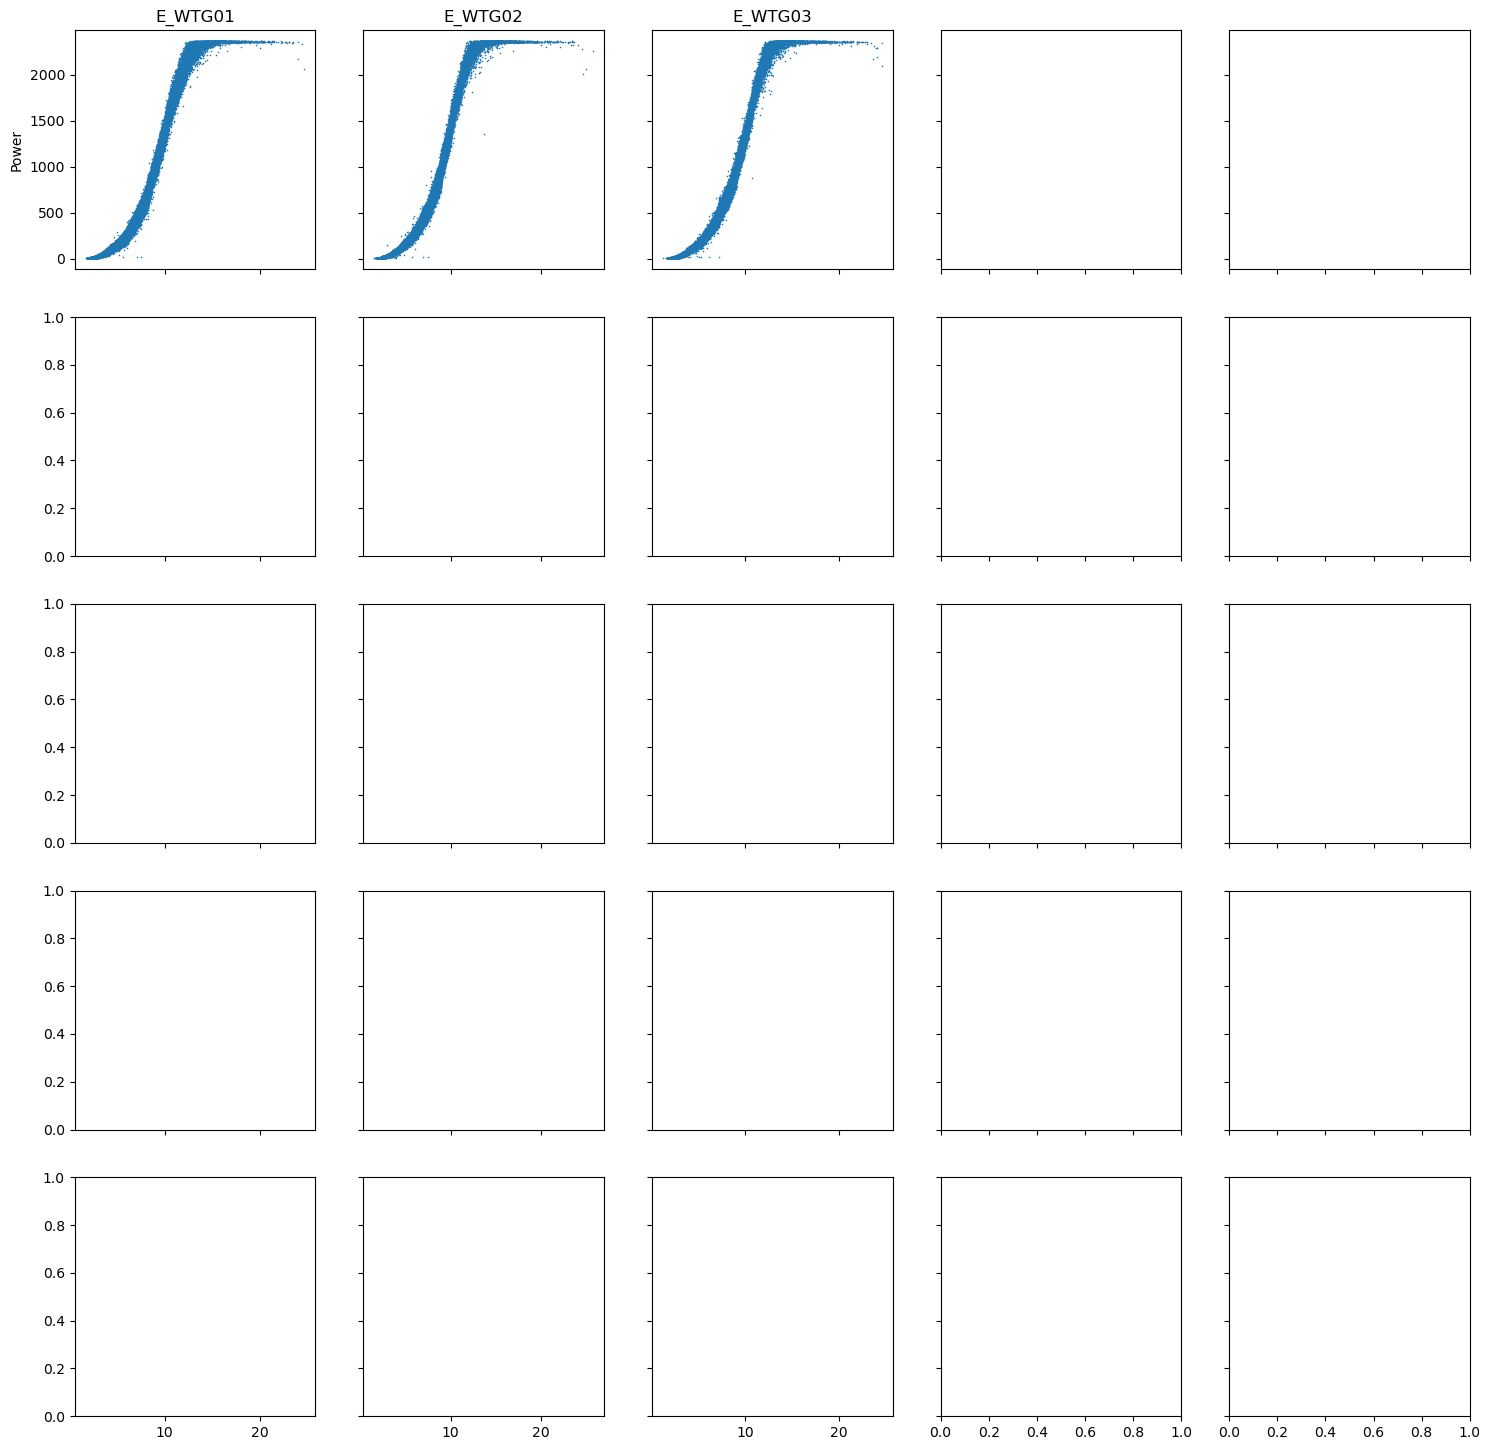

In [22]:
# Plot power curve for each turbine
func.plot_powercurve(df=data_clean, order=instanceID, figsize=(18,18))

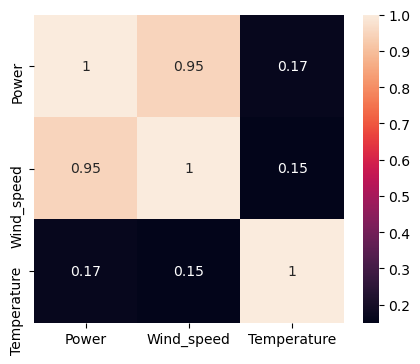

In [23]:
# Plot correlation between variables
plt.figure(figsize = (5,4))
sns.heatmap(data_clean[var].corr(), annot=True)
plt.show()

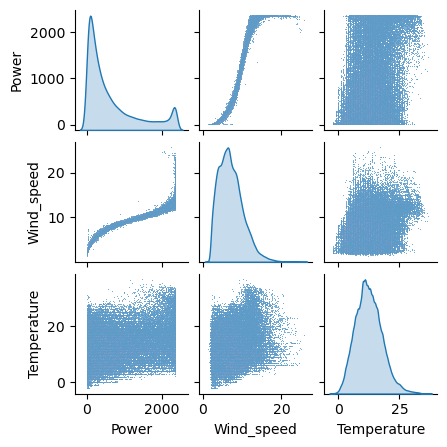

In [24]:
# Make pairplot of the variables
sns.pairplot(data_clean, vars = var, diag_kind = 'kde', plot_kws={'s' : 0.5}, height = 1.5)
plt.show()

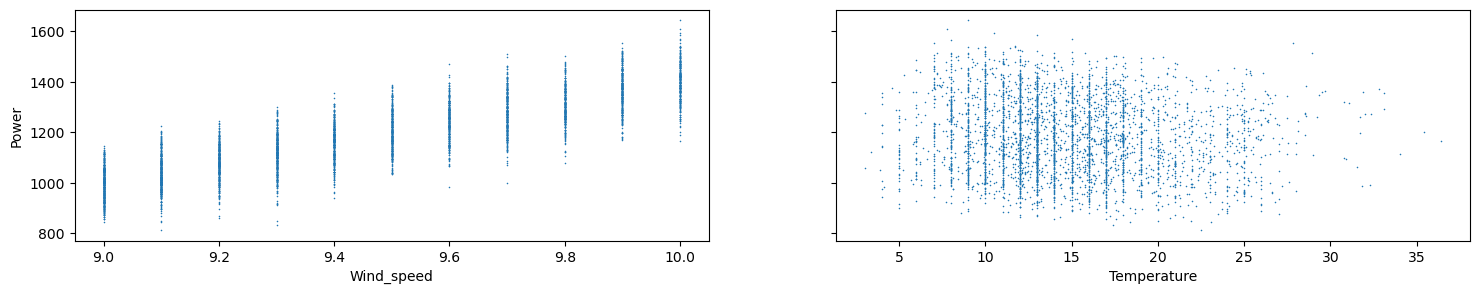

In [25]:
x_var = ["Wind_speed", "Temperature"]
func.plot_vars(df=data_clean, turbine_name= site + "_WTG01", ws_range=(9,10), x_var = x_var, figsize=(18,3))

### fit and save Standardscaler

In [26]:
from sklearn.preprocessing import StandardScaler
import pickle

In [27]:
# fit standardscaler and save it for later use (remove the mean and scale to unit variance)
scalerX = StandardScaler()
scalerX.fit(data_clean.iloc[:, 5:-1])
scalerY = StandardScaler()
scalerY.fit(data_clean.iloc[:, -1:])

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


StandardScaler()

In [28]:
# get parent directory
os.chdir("..")
directory = 'Data_clean'
scaler_nameX = site + "_scalerX.pkl"
scaler_nameY = site + "_scalerY.pkl"

# save 
pickle.dump(scalerX, open(os.path.join(os.getcwd(), directory, scaler_nameX),'wb'))
pickle.dump(scalerY, open(os.path.join(os.getcwd(), directory, scaler_nameY),'wb'))


### Sample data

In [29]:
# define sample size for pretraining (for a wind farm) 
# These pretraining samples are only used for neural networks. 
pretrain_size = 200000

# sample the data.
if len(data_clean) >= pretrain_size:
    data_pretrain = data_clean.sample(pretrain_size, random_state = 64)
else:
    data_pretrain = data_clean

data_pretrain

,ts,Month,Day,Hour,instanceID,Wind_speed,TI,Temperature,Power
0,2020-01-01 00:00:00,1,1,0,E_WTG01,6.2,NaN,6.0,236.0
1,2020-01-01 00:00:00,1,1,0,E_WTG02,5.8,NaN,5.0,275.0
2,2020-01-01 00:00:00,1,1,0,E_WTG03,5.9,NaN,2.0,279.0
3,2020-01-01 00:10:00,1,1,0,E_WTG01,5.7,NaN,6.0,269.0
4,2020-01-01 00:10:00,1,1,0,E_WTG02,5.6,NaN,4.9,224.0
...,...,...,...,...,...,...,...,...,...
158110,2020-12-31 23:50:00,12,31,23,E_WTG02,8.9,NaN,7.0,791.0
158111,2020-12-31 23:50:00,12,31,23,E_WTG03,8.6,NaN,6.0,744.0
158112,2021-01-01 00:00:00,1,1,0,E_WTG01,8.7,NaN,8.0,838.0
158113,2021-01-01 00:00:00,1,1,0,E_WTG02,8.8,NaN,7.0,757.0


In [30]:
# define sample size for training (for each turbine)
# For neural networks, these training samples are used for fine tuning. 
train_size = 10000

# sample the data. select equal number of training samples from each turbine. 
data_train = data_clean.groupby('instanceID', group_keys=False).apply(lambda x: x.sample(train_size, random_state = 22))

data_train

,ts,Month,Day,Hour,instanceID,Wind_speed,TI,Temperature,Power
11037,2020-01-26 13:10:00,1,26,13,E_WTG01,7.2,NaN,17.000000,445.0
150969,2020-12-15 11:10:00,12,15,11,E_WTG01,8.1,NaN,13.000000,576.0
6828,2020-01-16 19:20:00,1,16,19,E_WTG01,12.9,NaN,21.900000,2349.0
36498,2020-03-25 11:40:00,3,25,11,E_WTG01,4.9,NaN,19.600000,124.0
103833,2020-08-28 08:30:00,8,28,8,E_WTG01,9.3,NaN,15.777778,1064.0
...,...,...,...,...,...,...,...,...,...
95315,2020-08-08 15:10:00,8,8,15,E_WTG03,4.0,NaN,19.400000,81.0
140798,2020-11-21 22:00:00,11,21,22,E_WTG03,11.8,NaN,7.000000,2175.0
146840,2020-12-05 21:40:00,12,5,21,E_WTG03,5.6,NaN,6.000000,216.0
63221,2020-05-26 08:10:00,5,26,8,E_WTG03,8.6,NaN,17.300000,809.0


### Export data

In [31]:
file_name_clean = site + "_data_clean.csv"
file_name_pretrain = site + "_data_pretrain.csv"
file_name_train = site + "_data_train.csv"

# save 
data_clean.to_csv(os.path.join(os.getcwd(), directory, file_name_clean))
data_pretrain.to_csv(os.path.join(os.getcwd(), directory, file_name_pretrain))
data_train.to_csv(os.path.join(os.getcwd(), directory, file_name_train))

# reset to current directory
fd = sys.path[0]
os.chdir(fd)